In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from scholarly import scholarly
import re
import networkx as nx

from coauthorship import *

%matplotlib inline

In [2]:

name = 'Marine Lasbleis'
short_name = "M Lasbleis"

search_query = scholarly.search_author('Marine Lasbleis')
author = next(search_query)#.fill()
print(author)

{'affiliation': 'MSCA-IF Fellow, Université de Nantes',
 'citedby': 126,
 'email': '@univ-nantes.fr',
 'filled': False,
 'id': 'QOi1XIEAAAAJ',
 'interests': ['geodynamics', 'planetary cores', '2-phase flow'],
 'name': 'Marine Lasbleis',
 'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=QOi1XIEAAAAJ'}


In [3]:
author_list, relationships = extract_relationships(name, verbose=True, citation_threshold=1)

You are looking at the Google scholar profile of Marine Lasbleis, from MSCA-IF Fellow, Université de Nantes
Experimental study of libration-driven zonal flows in a straight cylinder
The language of exoplanet ranking metrics needs to change
Sharp hemisphere boundaries in a translating inner core
Building a regime diagram for the Earth’s inner core
Earth's inner core dynamics induced by the Lorentz force
Fluid Dynamics of Earth’s Core: Geodynamo, Inner Core Dynamics, Core Formation
GrowYourIC: A Step Toward a Coherent Model of the Earth's Inner Core Seismic Structure
Parameterisations of interior properties of rocky planets: An investigation of planets with Earth-like compositions but variable iron
Snow Model for the F-Layer


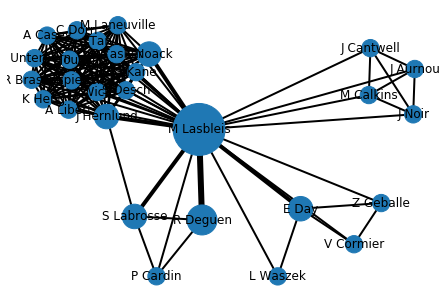

In [11]:


G = nx.Graph()

#add weights to edges
edge_list = [] #test networkx
for index, row in relationships.iterrows():
    i = 0
    for col in row:
        weight = float(col)/1.
        edge_list.append((index, relationships.columns[i], weight))
        i += 1
updated_edge_list = [x for x in edge_list if not x[2] == 0.0]

#print(edge_list)
#remove self references
for i in updated_edge_list:
    if i[0] == i[1]:
        updated_edge_list.remove(i)



G.add_weighted_edges_from(edge_list)
#reorder edge list - this was a pain
test = nx.get_edge_attributes(G, 'weight')
# print(test)


updated_again_edges = []
for i in nx.edges(G):
    for x in test.keys():
        if i[0] == x[0] and i[1] == x[1]:
            updated_again_edges.append(test[x])
            
widths = [x*2 for x in updated_again_edges]
#print(widths)

for name in author_list:
    G.add_node(name, size=800*author_list[name])

updated_node_order = []
for i in G.nodes():
    for x in author_list:
        #print(i, x, i==x)
        if x == i:
            #print(x)
            updated_node_order.append(x)

pos = nx.spring_layout(G, k=0.1, iterations=60)
nx.draw(G, pos, with_labels=True, node_size=[author_list[k]*300 for k in updated_node_order],  width = widths)
